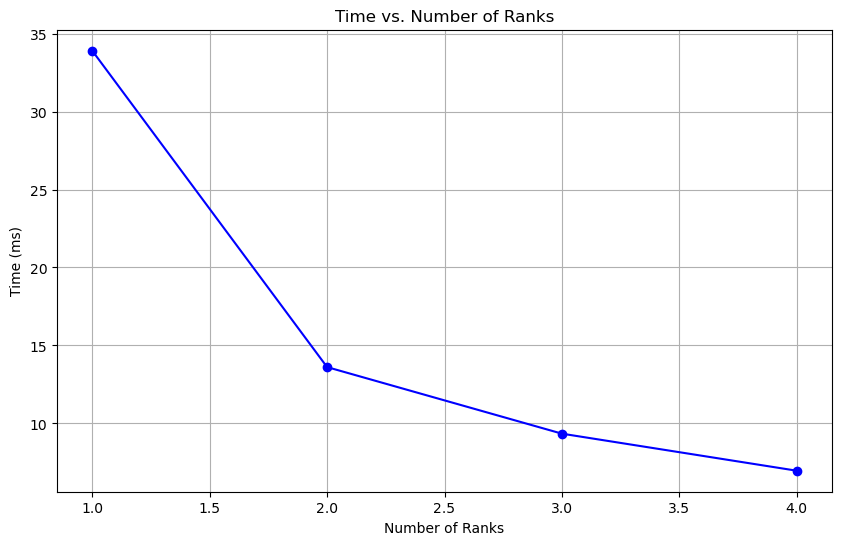

In [2]:
import matplotlib.pyplot as plt

# Data
ranks = [1, 2, 3, 4]
time_ms = [33.900, 13.610, 9.341, 6.965]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(ranks, time_ms, marker='o', color='b', linestyle='-')

# Add labels and title
plt.title('Time vs. Number of Ranks')
plt.xlabel('Number of Ranks')
plt.ylabel('Time (ms)')
plt.grid(True)

# Show plot
plt.show()


In [3]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("results.csv")


df['error'] = abs(df['pi'] - 3.14159265358979323846)


In [4]:
df

,cores,wall_time,pi,darts,rounds,error
0,1,4.354700,3.14174,1000000,100,0.000147
1,2,2.161810,3.14205,1000000,100,0.000457
2,4,1.082930,3.14246,1000000,100,0.000867
3,8,0.637709,3.14210,1000000,100,0.000507
4,16,0.319282,3.14211,1000000,100,0.000517
5,32,0.185931,3.14273,1000000,100,0.001137
6,64,0.112858,3.14259,1000000,100,0.000997
7,1,4.045980,3.14174,1000000,100,0.000147
8,2,2.082560,3.14205,1000000,100,0.000457
9,4,1.081060,3.14246,1000000,100,0.000867


In [5]:
df.columns

Index(['cores', ' wall_time ', 'pi', ' darts', ' rounds', 'error'], dtype='object')

ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

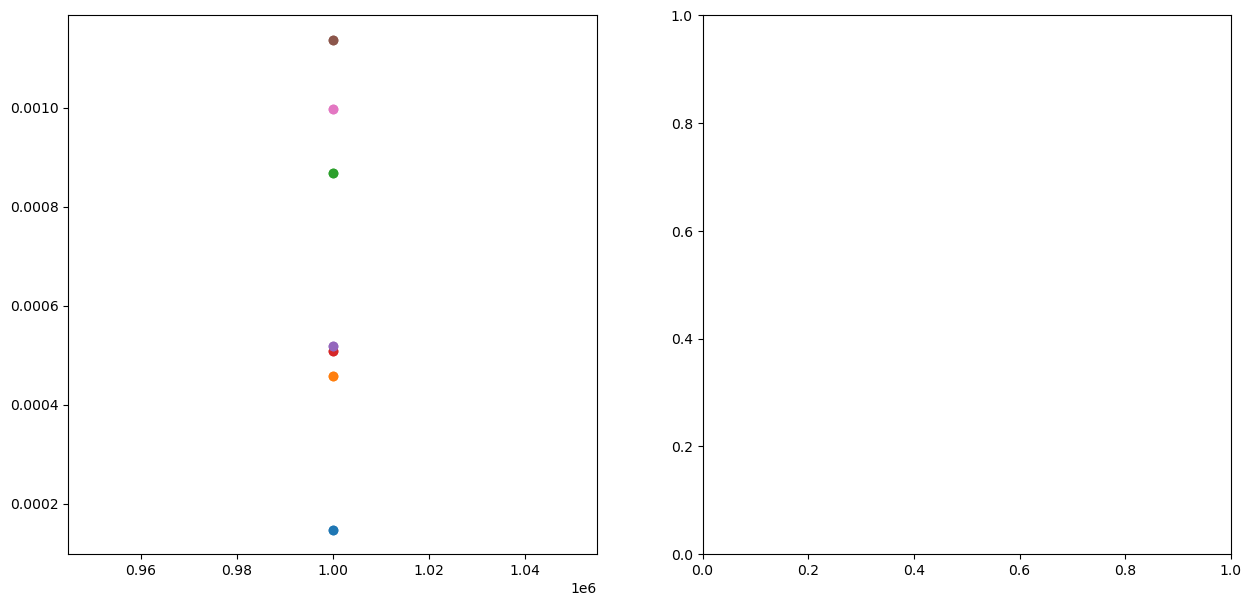

In [6]:
avg_err = [] #average error for each core
# Create the subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1: Error vs. Number of Darts (by Number of Cores)
for darts, group in df.groupby(' darts'):
    avg_err.append(sum(group['error'])/len(group['error']))
for cores, group in df.groupby('cores'):
    axs[0].plot(group[' darts'], group['error'], label=f'{cores} cores', marker='o')
axs[0].plot([1e3,1e6,1e9],avg_err,label = 'Avg',marker = 'o', color='red', linestyle='dashed',linewidth = 3)
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylim([1e-6,1])
axs[0].set_xlabel('Number of Darts')
axs[0].set_ylabel('Error from Exact Pi')
axs[0].set_title('Error from Exact Pi vs. Number of Darts')
axs[0].legend()
axs[0].grid(True)

# Plot 2: Error vs. Number of Cores (by Number of Darts)
for darts, group in df.groupby(' darts'):
    axs[1].plot(group['cores'], group['error'], label=f'{darts} darts', marker='o')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Number of Cores')
axs[1].set_ylabel('Error from Exact Pi')
axs[1].set_title('Error from Exact Pi vs. Number of Cores')
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

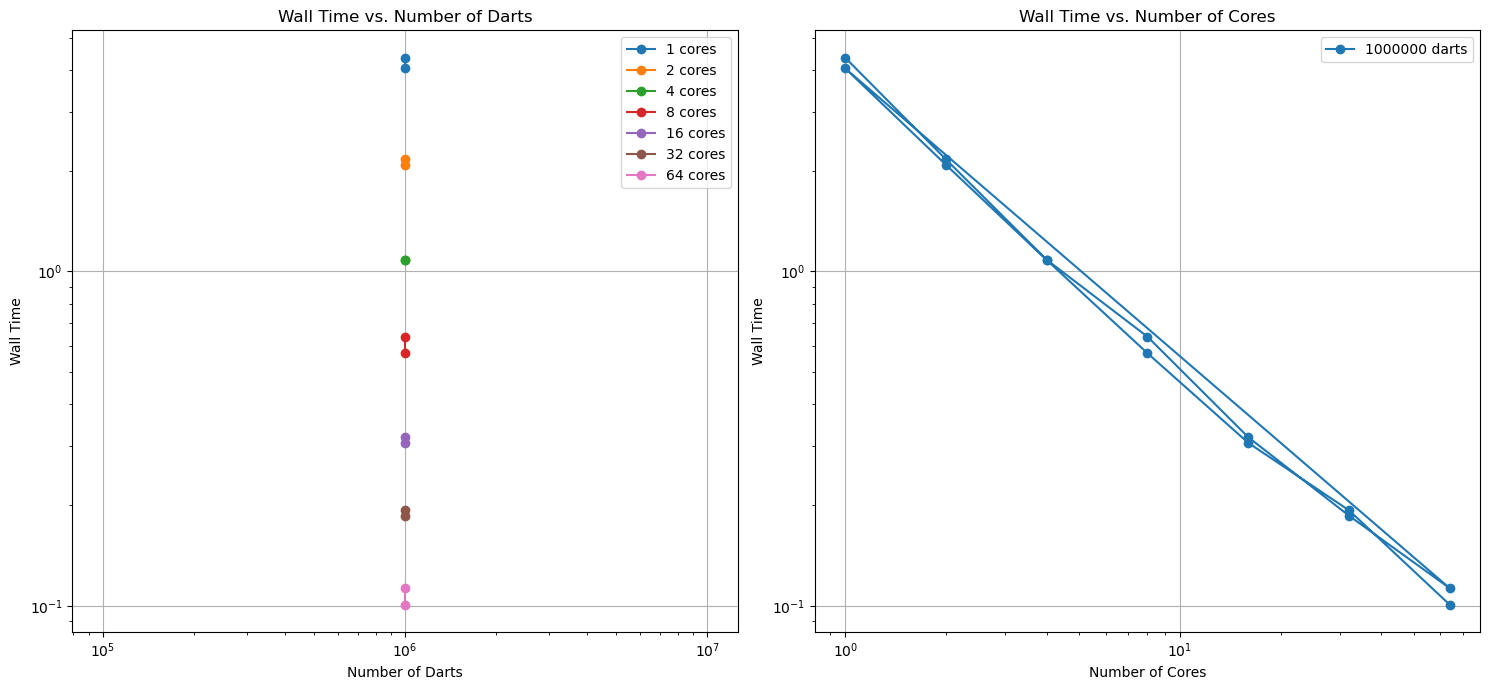

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("results.csv")

# Create the subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Plot 1: Wall Time vs. Number of Darts (by Number of Cores)
for cores, group in df.groupby('cores'):
    axs[0].plot(group[' darts'], group[' wall_time '], label=f'{cores} cores', marker='o')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_xlabel('Number of Darts')
axs[0].set_ylabel('Wall Time')
axs[0].set_title('Wall Time vs. Number of Darts')
axs[0].legend()
axs[0].grid(True)

# Plot 2: Wall Time vs. Number of Cores (by Number of Darts)
for darts, group in df.groupby(' darts'):
    axs[1].plot(group['cores'], group[' wall_time '], label=f'{darts} darts', marker='o')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
axs[1].set_xlabel('Number of Cores')
axs[1].set_ylabel('Wall Time')
axs[1].set_title('Wall Time vs. Number of Cores')
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [8]:
import numpy as np

# Define the combinations of darts and cores
combinations = [
    {' darts': 1000, 'cores': 1},
    {' darts': 1000000, 'cores': 1},
    {' darts': 1000000000, 'cores': 1}
]

time1 = []


# Find the wall time for each combination
for combination in combinations:
    darts, cores = combination[' darts'], combination['cores']
    wall_time = df.loc[(df[' darts'] == darts) & (df['cores'] == cores), ' wall_time '].iloc[0]
    time1.append(wall_time)

t1 = np.array(time1)
t64 = t1/64

IndexError: single positional indexer is out-of-bounds

NameError: name 't1' is not defined

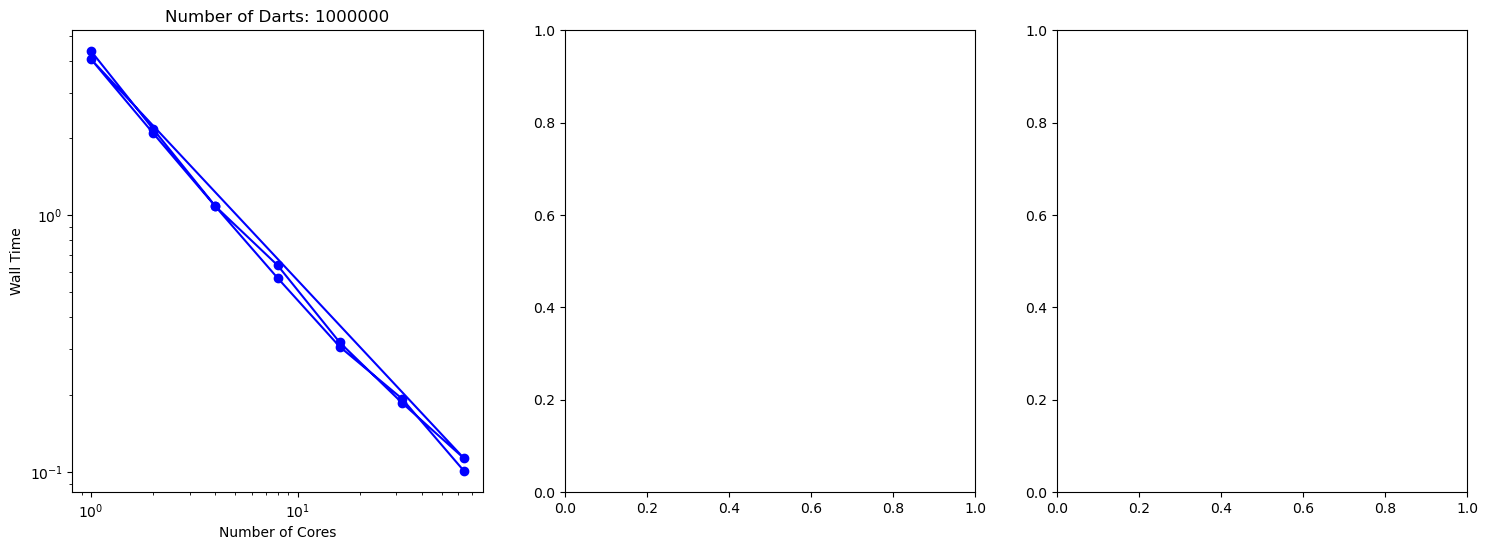

In [9]:
import pandas as pd
import matplotlib.pyplot as plt




# Create the subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Group by the number of darts
grouped = df.groupby(' darts')

# Iterate over each group and create a subplot
for i, (darts, group) in enumerate(grouped):
    ax = axs[i]
    ax.set_title(f'Number of Darts: {darts}')
    ax.set_xlabel('Number of Cores')
    ax.set_ylabel('Wall Time')
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    # Plot wall time versus core numbers
    ax.plot(group['cores'], group[' wall_time '], marker='o',color='b', label='actual')
    ax.plot([1,64],[t1[i],t64[i]] ,  linestyle='--',color='r', label='ideal')

    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [10]:
df10e3 = pd.DataFrame(None)
df10e6 = pd.DataFrame(None)
df10e9 = pd.DataFrame(None)

df10e3 = df[df[' darts'] == 1000]
df10e6 = df[df[' darts'] == 1000000]
df10e9 = df[df[' darts'] == 1000000000]
df10e3['min_wall_time'] = df10e3.groupby(' darts')[' wall_time '].transform('max')
df10e6['min_wall_time'] = df10e6.groupby(' darts')[' wall_time '].transform('max')
df10e9['min_wall_time'] = df10e9.groupby(' darts')[' wall_time '].transform('max')
df10e3['efficiency'] = df10e3['min_wall_time'] / (df10e3[' wall_time '] * df10e3['cores'])
df10e6['efficiency'] = df10e6['min_wall_time'] / (df10e6[' wall_time '] * df10e6['cores'])
df10e9['efficiency'] = df10e9['min_wall_time'] / (df10e9[' wall_time '] * df10e9['cores'])


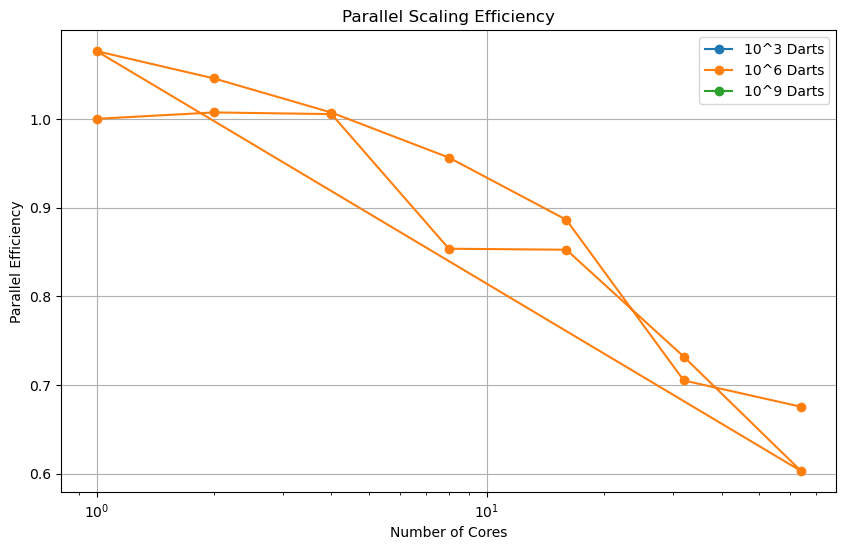

In [12]:
# Plot the parallel efficiency for each dart number
plt.figure(figsize=(10, 6))

plt.plot(df10e3['cores'], df10e3['efficiency'], label='10^3 Darts', marker='o')
plt.plot(df10e6['cores'], df10e6['efficiency'], label='10^6 Darts', marker='o')
plt.plot(df10e9['cores'], df10e9['efficiency'], label='10^9 Darts', marker='o')

plt.xlabel('Number of Cores')
plt.ylabel('Parallel Efficiency')
plt.title('Parallel Scaling Efficiency')
plt.grid(True)
plt.xscale('log')
plt.legend()
plt.show()

In [13]:
df

,cores,wall_time,pi,darts,rounds
0,1,4.354700,3.14174,1000000,100
1,2,2.161810,3.14205,1000000,100
2,4,1.082930,3.14246,1000000,100
3,8,0.637709,3.14210,1000000,100
4,16,0.319282,3.14211,1000000,100
5,32,0.185931,3.14273,1000000,100
6,64,0.112858,3.14259,1000000,100
7,1,4.045980,3.14174,1000000,100
8,2,2.082560,3.14205,1000000,100
9,4,1.081060,3.14246,1000000,100


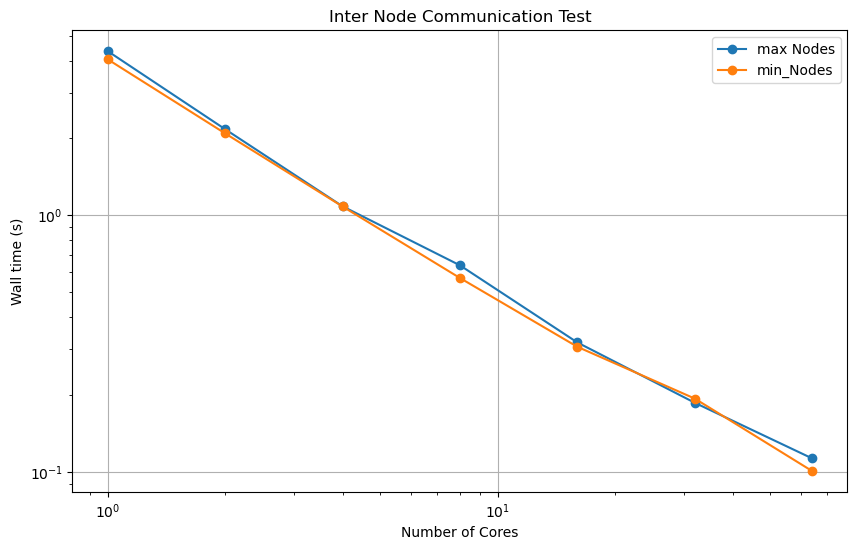

In [21]:
plt.figure(figsize=(10, 6))

plt.semilogy(df['cores'][:7], df[' wall_time '][:7], label='max Nodes', marker='o')
plt.semilogy(df['cores'][7:], df[' wall_time '][7:], label='min_Nodes', marker='o')

plt.xlabel('Number of Cores')
plt.ylabel('Wall time (s)')
plt.title('Inter Node Communication Test')
plt.grid(True)
plt.xscale('log')
plt.legend()
plt.show()